# **TP Perceptron** 
## Omar Kilbi 
MPDS2

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

In [ ]:
import os
os.chdir('/gdrive/My Drive/Deep Learning/DL-TP1-etudiant/')
os.getcwd()
os.listdir()

['TP1-Perceptron.ipynb',
 'lr_utils.py',
 'datasets',
 'images',
 'perceptron.ipynb']

# Regression logistique

**Objectif :**

Conception et implémentation d'un perceptron pour des fins de classification 


## 1 - Packages ##

Téléchargement des packages 
- [numpy](http://www.numpy.org) --> calcul numérique.
- [h5py](http://www.h5py.org) --> gestion des fichiers .H5
- [matplotlib](http://matplotlib.org) --> graphique en Python
- [PIL](https://python-pillow.org/) --> traitement des images (Rq : pour Python 3 : pip install pillow)
- [scipy](https://www.scipy.org/) --> calcul scientifique

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from skimage.transform import rescale, resize
import scipy
from lr_utils import load_dataset

## 2 - Problématique ##

**Base**: 

La base ("data.h5") contient:
    - base d'apprentissage (m_train) images étiquettées chat (y=1) or non-chat (y=0)
    - base de test (m_test) images 
    - dim image (num_px, num_px, 3) 
    
**Objectif :**

Classifier les images selon leurs contenus chat/non-chat via un perceptron

In [ ]:
# Téléchargement
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [ ]:
train_set_x_orig.shape
type(train_set_x_orig )

numpy.ndarray

y = [1]


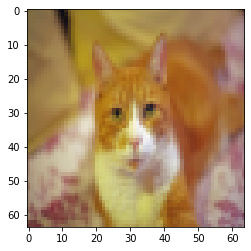

In [ ]:
# Exemple : image numéro 25
# changer l'indice pour explorer la base
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]))

Il est important de déterminer les dimensions de la base

**Exercise:** trouver les valeurs
    - m_train 
    - m_test 
    - num_px 

Remarque : utiliser la méthode (.shape)

In [ ]:
## afficher les dimensions de la base d'pprentissage, test, 
print(" les dim de la base:{train_set_x_orig.shape:} Voir la suite")

### Votre code ### 
m_train = train_set_x_orig.shape
m_test = test_set_x_orig.shape 
num_px = train_set_x_orig.shape[1]
### Fin ###

print ("m_train = " + str(m_train))
print ("m_test = " + str(m_test))
print ("longueur/largeur de l'image: num_px = " + str(num_px))

## Afficher les dimensions de tous les données nécessaires à la mise en oeuvre du perceptron
train_set_x_orig.shape



 les dim de la base:{train_set_x_orig.shape:} Voir la suite
m_train = (209, 64, 64, 3)
m_test = (50, 64, 64, 3)
longueur/largeur de l'image: num_px = 64


(209, 64, 64, 3)

**Mis en forme des données d'entrée**

- Mettre sous forme de vecteur les images de la base d'apprentissage 
- Utiliser la méthode (.reshape). pour passer d'une matrice (a,b,c,d) à une matrice (b$*$c$*$d,a) utiliser 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # .T opérateur transposée
```

In [ ]:
# Mise en forme

### Votre code ### 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### Fin ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Résultats attendus**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

In [ ]:
## Normalisation des données d'entrées
## Normaliser les image d'apprentissage 
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

## 3 - Architecture de l'alogorithme d'apprentissage ##

- A l'aide d'un schéma, représenter le perceptron ainsi les données d'apprentissage, les paramètres,... n'oublier pas les dimensions des objets manipulés. 


**Expressions mathématiques de l'alogorithme**:

Pour une instance $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = v^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(v^{(i)}, y^{(i)}) =  - y^{(i)}  \log(v^{(i)}) - (1-y^{(i)} )  \log(1-v^{(i)})\tag{3}$$

La fonction coût est calculée à partir de toutes les instances d'apprentissage:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(v^{(i)}, y^{(i)})\tag{6}$$

**Etapes à suivre**:

- Initialisation les paramètres
- Apprentissage des paramètres du modèle
- Utilisation du modèle pour prédire s'il y en a un chat ou non dans une image
- Analyse des résultats

## 4 - Algorithme ##

### 4.1 - Fonction d'activation

**Exercice**: Implémenter la fonction sigmoïd "sigmoid()" : $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ 

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


In [ ]:
# tester la fonction sigmoid
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


**Résultat attendus**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initialisation des paramètres

**Exercice:** Imlémenter une fonction qui initialise les paramètres du modèles (W,b) à zéros "initialize_with_zeros(dim)" 

avec dim = taille de W

In [ ]:
def initialize_with_zeros (dim):
    w = np.zeros(shape=(dim,1), dtype=float)
    b = 0.0
    return w, b

In [ ]:
# tester la fonction d'initialisation 
w,b = initialize_with_zeros(1)
type(w)
w[0:10]

array([[0.]])

### 4.3 - Propagation & Retropropagation 

**Exercice:** Implémenter la fonction `propagate()` qui calcul la fonction coût ainsi son Gradient.

Propagation:
- La valeur prédite $V = \sigma(w^T X + b) = (v^{(0)}, v^{(1)}, ..., v^{(m-1)}, v^{(m)})$
- La fonction coût $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(v^{(i)})+(1-y^{(i)})\log(1-v^{(i)})$



$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(V-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (v^{(i)}-y^{(i)})\tag{8}$$


In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Fonction coût et son gradient

    Entrées:
    w --  (num_px * num_px * 3, 1)
    b --  (1,1)
    X --  images (num_px * num_px * 3, number of examples)
    Y --  étiquette

    Sorties:
    cost -- coût
    dw -- 
    db -- 
    """
        
    # Propagation 
    V = sigmoid(np.dot(w.T,X) + b) 
    m = X.shape[0]     
    cost = -1/m * (np.sum((Y * np.log(V)) + (1-Y) * np.log(1 - V),  axis=1))
    
    
    # Retropropagation 
    dw = 1/m * np.dot(X, (V - Y).T)
    db = 1/m * np.sum((V - Y), axis=1)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [ ]:
# test de la fonction propagate
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = [0.49993523]
cost = [6.00006477]


**Résultats attendus**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### d) Optimisation (apprentissage)

**Exercise:** Ecrire une fonction d'apprentissage ==> w et b en minimisant la fonction coût 



In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Arguments:
    w -- Poids synaptiques (num_px * num_px * 3, 1)
    b -- bias
    X -- images d'apprentissage (num_px * num_px * 3, number of examples)
    Y -- étiquette
    num_iterations -- nombre d'époques (epochs)  
    learning_rate -- 
    print_cost -- True impression de la fonction coût chaque 100 étapes
    
    Returns:
    params -- dictionaire contenant w et le bias b
    grads --  dictionaire contenant les gradients 
    costs --  liste de tous les coûts (sera utilisé ultérieurement).
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
                
        # enregistrement des coût
        if i % 100 == 0:
            costs.append(cost)
        
        # affichage du coût chaque 100 instances
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [ ]:
# test de la fonction
params, grads, costs = optimize(w, b, X, Y, num_iterations = 1200, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 6.000065
Cost after iteration 100: 1.431400
Cost after iteration 200: 0.555462
Cost after iteration 300: 0.539181
Cost after iteration 400: 0.524624
Cost after iteration 500: 0.510649
Cost after iteration 600: 0.497230
Cost after iteration 700: 0.484340
Cost after iteration 800: 0.471956
Cost after iteration 900: 0.460054
Cost after iteration 1000: 0.448614
Cost after iteration 1100: 0.437612
w = [[-1.15029267]
 [-0.14961715]]
b = [2.00033776]
dw = [[ 0.08881864]
 [-0.0229142 ]]
db = [-0.05586642]


**Resultats attendus**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>    
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

### e) Prédiction

**Exercise:**  Implémenter une fonction "predict()" qui prédit l'étiquette d'une image.    
 
Deux étapes :

1. Calculer $\hat{Y} = V = \sigma(w^T X + b)$

2. Convertion 0 (si activation <= 0.5) ou 1 (si activation > 0.5), puis enregistrer les prédictions dans un vecteur `Y_prediction` 

In [ ]:
def predict(w, b, X):
    '''
    Sortie:
    Y_prediction -- 
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    None
      
        
    return Y_prediction

In [ ]:
# test de la fonction
print ("predictions = " + str(predict(w, b, X)))

NameError: name 'predict' is not defined

**Résultat attendus**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


## 5 - Modèle global ##

Implémentation de l'ensemble du modèle

**Exercise:** Implementer le modèle en utilisant les notations suivantes :
    - Y_prediction : prédiction (base test) 
    - Y_prediction_train : prédiction (base apprentissage)
    - w, costs, grads sorties de optimize()

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    print_cost = True  -- affichage du coût chaque 100 itérations 
    
    d -- dictionaire contenant le modèle 
    """
    
    # initialisation 
    w, b = None

    # Gradient descendent 
    parameters, grads, costs = None
    
    # extraction de w et b
    w = parameters["w"]
    b = parameters["b"]
    
    # Prediction test/apprentissage 
    Y_prediction_test = None
    Y_prediction_train = None

    
    # Affichage erreur de prédiction
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [ ]:
# tester le modèle
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

NameError: name 'model' is not defined

**Resultats attendus**: 

<table style="width:40%">     
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>
    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 

In [ ]:
# figure : évolution du coût  
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('itérations (par 100)')
plt.title("pas =" + str(d["learning_rate"]))
plt.show()

NameError: name 'd' is not defined

## 6 - Choix du pas d'adaptation ##

Le code suivant mets en évidence l'importance du choix du pas d'adaptation. Exécuter le code & interprter. 

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

learning rate is: 0.01


TypeError: cannot unpack non-iterable NoneType object

## 7 - Tester vos propres images ##

In [ ]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "im2.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = skimage.transform.resize(image, output_shape=(64, 64)).reshape((1, 64*64*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", L'algorithme estime que \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8"))

AttributeError: module 'scipy.ndimage' has no attribute 'imread'